In [228]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn import metrics

# Ignore warnings
warnings.filterwarnings('ignore')

In [229]:
# Loading the data
df2 = pd.read_pickle('df_after_fs.pkl')

In [230]:
df2.describe()

,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,popularity,type,status,episode_run_time,name_contains_life_new,...,origin_country_cn,origin_country_jp,origin_country_in,origin_country_fr,origin_country_de,origin_country_kr,origin_country_gb,origin_country_ca,origin_country_other,origin_country_us
count,51372.0,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,...,51372.000000,51372.000000,51372.000000,51372.000000,51372.0,51372.0,51372.000000,51372.0,51372.0,51372.000000
mean,1.0,15.174414,14.834326,2.782773,0.011602,5.283645,3.184478,3.627540,17.936000,0.007339,...,0.000311,0.075858,0.027700,0.026707,0.0,0.0,0.050670,0.0,0.0,0.151639
std,0.0,33.728660,180.168726,3.641913,0.107085,41.067166,1.502904,1.918211,22.986118,0.085352,...,0.017645,0.264774,0.164113,0.161228,0.0,0.0,0.219324,0.0,0.0,0.358674
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,1.0,3.000000,0.000000,0.000000,0.000000,0.600000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,1.0,8.000000,0.000000,0.000000,0.000000,1.030000,4.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,1.0,16.000000,1.000000,6.800000,0.000000,2.706000,4.000000,5.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
max,1.0,1480.000000,13053.000000,10.000000,1.000000,3065.138000,6.000000,5.000000,102.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000


Evaluations Metrics (label is continuous variable)

In [232]:
def regressionMetrics(y, yhat):
    # Ensuring non-negative values for RMSLE computation
    y = np.maximum(y, 0) + 1e-6  
    yhat = np.maximum(yhat, 0) + 1e-6  

    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, yhat))  # No need for abs()
    }
    return res

# Creating and Train the Model

In [234]:
y = df2.popularity
X = df2.drop(columns=['popularity'])

# Splitting into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Splitting train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Regression Models (label is continuous variable)

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

### Linear Regression

In [238]:
# Creating and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Use X_train and y_train

# Making predictions on the validation set
y_val_pred = model.predict(X_val)

In [239]:
regressionMetrics(y_val, y_val_pred)

{'MSE': 1054.0482566214234,
 'RMSE': 32.4661093545473,
 'MAE': 6.175613159722322,
 'RMSLE': 0.9674675540336496}

In [240]:
# Initializing models_list as an empty DataFrame with the required columns
models_list = pd.DataFrame(columns=['model', 'MSE', 'RMSE', 'MAE', 'RMSLE'])

# Creating a new model dictionary
model_dict = {'model': "Linear Regression"}

# Creating new row with model and regression metrics
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred)}])

# If the model doesn't already exist in models_list, appending the new row
if model_dict['model'] not in models_list['model'].values:
    models_list = pd.concat([models_list, new_row], ignore_index=True)

# Displaying the updated models_list
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468


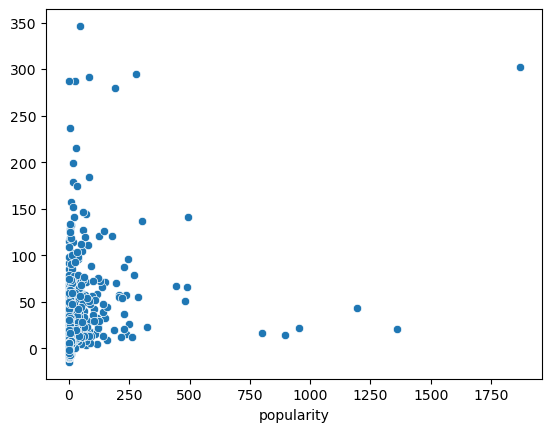

In [241]:
sns.scatterplot(x=y_val, y=y_val_pred)
plt.show()

### Decision Tree

In [243]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
# Making predictions on the validation set
y_val_pred2 = mod2.predict(X_val)

In [244]:
regressionMetrics(y_val, y_val_pred2)

{'MSE': 2680.8264319842874,
 'RMSE': 51.77669777017734,
 'MAE': 5.537055310898996,
 'RMSLE': 0.6493771426667594}

In [245]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377


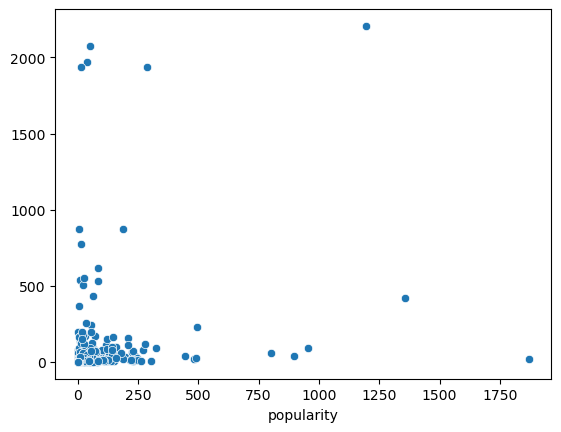

In [246]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred2)
plt.show()

### Random Forest

In [248]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
# Making predictions on the validation set
y_val_pred3 = mod3.predict(X_val)

In [249]:
regressionMetrics(y_val, y_val_pred3)

{'MSE': 1139.6117511000266,
 'RMSE': 33.75813607265701,
 'MAE': 4.526310577491858,
 'RMSLE': 0.5599791093011357}

In [250]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
2,RandomForest,1139.611751,33.758136,4.526311,0.559979


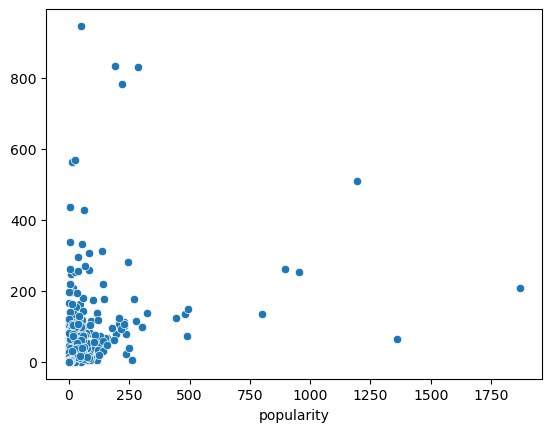

In [251]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred3)
plt.show()

### Adaptive Boosting (ADABoost)

In [253]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [254]:
# Making predictions on the validation set
y_val_pred4 = mod4.predict(X_val)

In [255]:
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
2,RandomForest,1139.611751,33.758136,4.526311,0.559979
3,ADABoost,4926.608229,70.189801,27.902441,2.252289


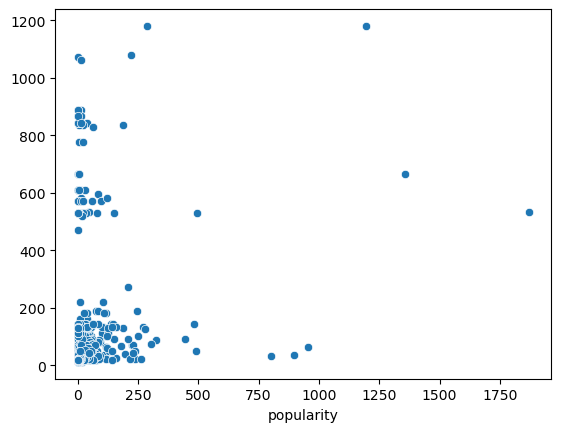

In [256]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred4)
plt.show()

### Gradient Boosting Machine (GBM)

In [258]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [259]:
# Making predictions on the validation set
y_val_pred5 = mod5.predict(X_val)

In [260]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
2,RandomForest,1139.611751,33.758136,4.526311,0.559979
3,ADABoost,4926.608229,70.189801,27.902441,2.252289
4,GBM,1268.640765,35.617984,4.784845,0.665373


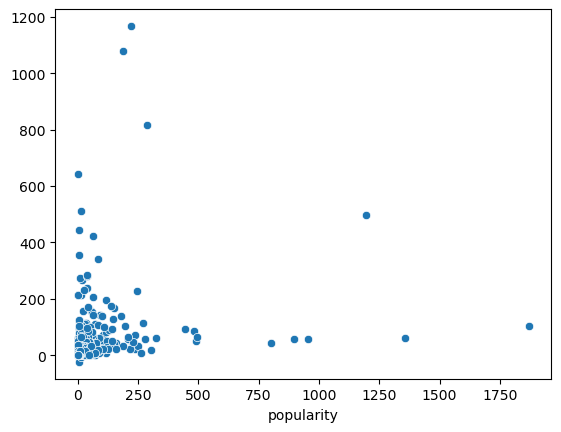

In [261]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred5)
plt.show()

### Support Vector Machine (SVM)

In [263]:
mod6 = SVR()
mod6.fit(X_train, y_train)
# Making predictions on the validation set 
y_val_pred6 = mod6.predict(X_val)

In [264]:
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
2,RandomForest,1139.611751,33.758136,4.526311,0.559979
3,ADABoost,4926.608229,70.189801,27.902441,2.252289
4,GBM,1268.640765,35.617984,4.784845,0.665373
5,SVM,1140.083241,33.765119,3.989961,0.681865


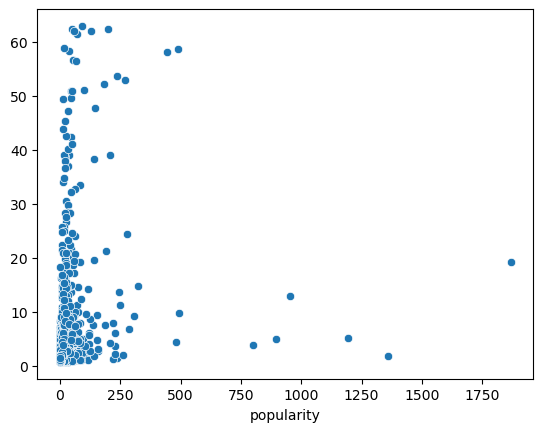

In [265]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred6)
plt.show()

### XGBoost Regressor

In [267]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)
# Making predictions on the validation set
y_val_pred7 = mod7.predict(X_val)

In [268]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
2,RandomForest,1139.611751,33.758136,4.526311,0.559979
3,ADABoost,4926.608229,70.189801,27.902441,2.252289
4,GBM,1268.640765,35.617984,4.784845,0.665373
5,SVM,1140.083241,33.765119,3.989961,0.681865
6,XGB,1672.743778,40.899190,4.822534,0.591060


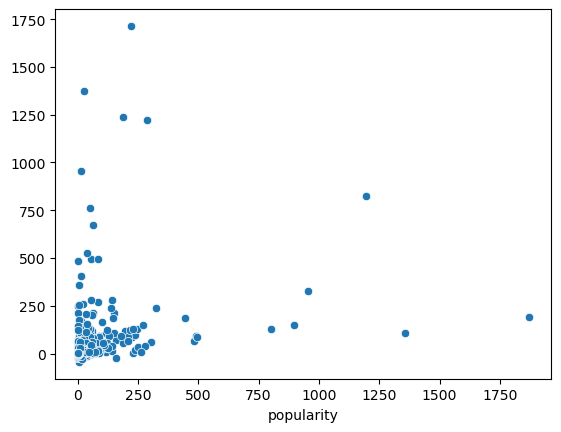

In [269]:
# Creating the scatter plot
sns.scatterplot(x=y_val, y=y_val_pred7)
plt.show()

## Model Selection

In [271]:
models_list.sort_values('RMSLE')

,model,MSE,RMSE,MAE,RMSLE
2,RandomForest,1139.611751,33.758136,4.526311,0.559979
6,XGB,1672.743778,40.899190,4.822534,0.591060
1,Decision Tree,2680.826432,51.776698,5.537055,0.649377
4,GBM,1268.640765,35.617984,4.784845,0.665373
5,SVM,1140.083241,33.765119,3.989961,0.681865
0,Linear Regression,1054.048257,32.466109,6.175613,0.967468
3,ADABoost,4926.608229,70.189801,27.902441,2.252289


Except MAE - the Random Forest Regressor got the best results in all the other metrics

# Finetuning (random hyperparameters & cross validation)

In [274]:
# Reducing number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keeping essential options only
min_samples_leaf = [1, 2, 4]  # Reducing options for leaf samples
bootstrap = [True, False]  # Keeping as is

# Creating a lighter random grid
lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduceing number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

# Fitting the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [275]:
# For comparison between evaluation of the base and fine-tuning models results

In [276]:
def evaluate(model, test_features, test_labels):
    # Predicting values using the model
    predictions = model.predict(test_features)

    # Ensuring no negative values are passed to the log function
    predictions = np.maximum(predictions, 0)  # Prevent log(0), ensuring positive values

    # Calculating RMSLE
    log_diff = np.log(predictions + 1) - np.log(test_labels + 1)
    rmsle = np.sqrt(np.mean(log_diff**2))

    # Printing the Model Performance
    print('Model Performance')
    print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.4f}')

    return rmsle

### Running base Model

In [278]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 4)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Root Mean Squared Logarithmic Error (RMSLE): 0.5446


In [279]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Root Mean Squared Logarithmic Error (RMSLE): 0.6147


### Comparison

In [281]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of -12.86%.


## Conclusion 

No Improvment from Finetuning use regadring RMSLE, we will stay with the base model.